## Import libraries and define parameters

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json
import os
from pathlib import Path
from glob import glob

from subprocess import Popen, PIPE, STDOUT

In [2]:
base_path='/kaggle/input/arc-prize-2024/'
# Loading JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

Reading files:

In [3]:
training_challenges   = load_json(base_path +'arc-agi_training_challenges.json')
training_solutions    = load_json(base_path +'arc-agi_training_solutions.json')

evaluation_challenges = load_json(base_path +'arc-agi_evaluation_challenges.json')
evaluation_solutions  = load_json(base_path +'arc-agi_evaluation_solutions.json')

test_challenges       = load_json(base_path +'arc-agi_test_challenges.json')

### Function to plot input/output pairs of a task

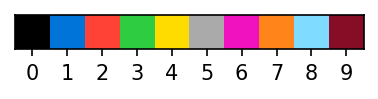

In [4]:
# 0:black, 1:blue, 2:red, 3:green, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown

cmap = colors.ListedColormap(
    ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(3, 1), dpi=150)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

In [5]:
def plot_task(task, task_solutions, i, t):
    """    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app    """    
    
    num_train = len(task['train'])
    num_test  = len(task['test'])
    
    w=num_train+num_test
    fig, axs  = plt.subplots(2, w, figsize=(3*w ,3*2))
    plt.suptitle(f'Set #{i}, {t}:', fontsize=20, fontweight='bold', y=1)
    #plt.subplots_adjust(hspace = 0.15)
    #plt.subplots_adjust(wspace=20, hspace=20)
    
    for j in range(num_train):     
        plot_one(axs[0, j], j,'train', 'input')
        plot_one(axs[1, j], j,'train', 'output')        
    
    
    plot_one(axs[0, j+1], 0, 'test', 'input')


    answer = task_solutions
    input_matrix = answer
    
    axs[1, j+1].imshow(input_matrix, cmap=cmap, norm=norm)
    axs[1, j+1].grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    axs[1, j+1].set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    axs[1, j+1].set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    axs[1, j+1].set_xticklabels([])
    axs[1, j+1].set_yticklabels([])
    axs[1, j+1].set_title('Test output')

    axs[1, j+1] = plt.figure(1).add_subplot(111)
    axs[1, j+1].set_xlim([0, num_train+1])
    
    for m in range(1, num_train):
        axs[1, j+1].plot([m,m],[0,1],'--', linewidth=1, color = 'black')
    
    axs[1, j+1].plot([num_train,num_train],[0,1],'-', linewidth=3, color = 'black')

    axs[1, j+1].axis("off")

    fig.patch.set_linewidth(5)
    fig.patch.set_edgecolor('black') 
    fig.patch.set_facecolor('#dddddd')
   
    plt.tight_layout()
    
    print(f'#{i}, {t}') # for fast and convinience search
    plt.show()  
    
    print()
    print()
    
    
def plot_one(ax, i, train_or_test, input_or_output):
    input_matrix = task[train_or_test][i][input_or_output]
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True, which = 'both',color = 'lightgrey', linewidth = 0.5)
    
    plt.setp(plt.gcf().get_axes(), xticklabels=[], yticklabels=[])
    ax.set_xticks([x-0.5 for x in range(1 + len(input_matrix[0]))])     
    ax.set_yticks([x-0.5 for x in range(1 + len(input_matrix))])
    
    ax.set_title(train_or_test + ' ' + input_or_output)


# <div  style="color:white; border:lightgreen solid;  font-weight:bold; font-size:120%; text-align:center;padding:12.0px; background:black">2. VISUALIZATION TRAINING SET</div>

# 000-050 tasks

#0, 007bbfb7


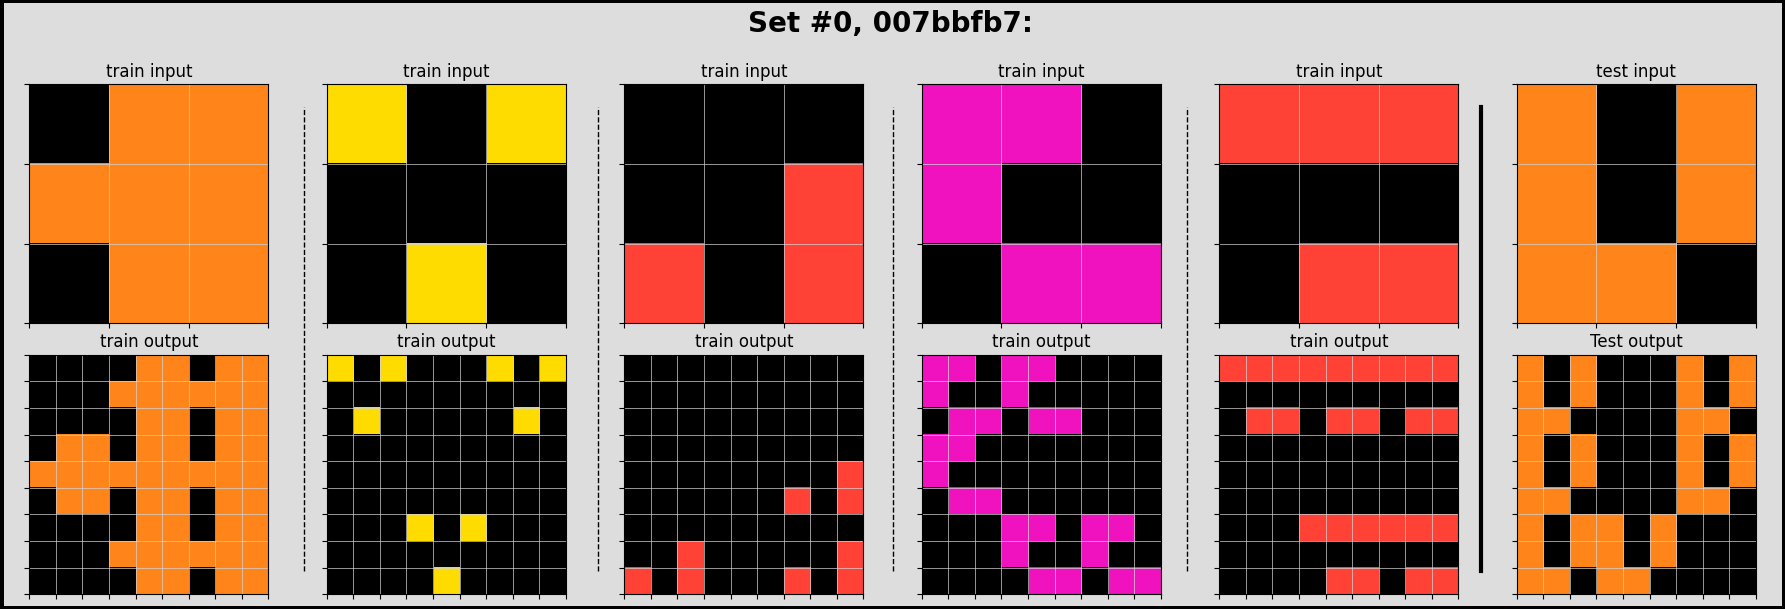

In [6]:
for i in range(1):
    t=list(training_challenges)[i]
    task=training_challenges[t]
    task_solution = training_solutions[t][0]
    plot_task(task,  task_solution, i, t)

In [7]:
def draw_task(i):
    t=list(training_challenges)[i]
    task=training_challenges[t]
    task_solution = training_solutions[t][0]
    plot_task(task,  task_solution, i, t)

## To be continued)

In [8]:
# I want to get the github package of generating data to work here 

In [9]:
# Getting a simple model to work and a basecase as fast as I can 

#1, 00d62c1b


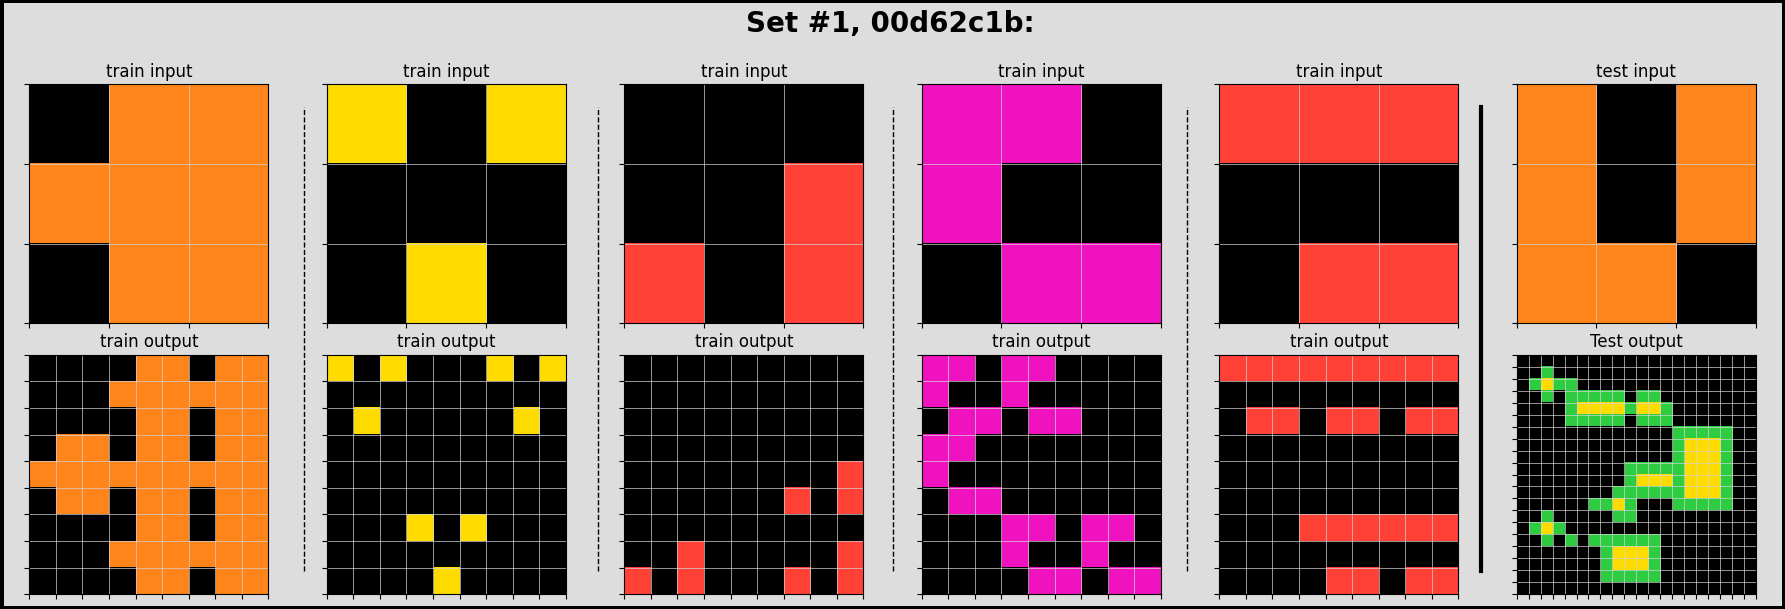

In [10]:
draw_task(1)

In [11]:
p = pd.DataFrame(training_challenges)
p

,007bbfb7,00d62c1b,017c7c7b,025d127b,045e512c,0520fde7,05269061,05f2a901,06df4c85,08ed6ac7,...,f8b3ba0a,f8c80d96,f8ff0b80,f9012d9b,fafffa47,fcb5c309,fcc82909,feca6190,ff28f65a,ff805c23
test,"[{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}]","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[1, 1, 1], [0, 1, 0], [0, 1, 0], [...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[1, 0, 1, 5, 1, 0, 1], [0, 1, 0, 5...","[{'input': [[0, 1, 0, 0, 0, 0, 2], [1, 0, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0...","[{'input': [[0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 5...",...,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[4, 4, 4, 4, 4, 4, 0, 0, 0, 0], [0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[8, 1, 8, 8, 0, 0, 0], [1, 8, 8, 1...","[{'input': [[9, 0, 9], [0, 0, 9], [9, 0, 9], [...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1...","[{'input': [[0, 6, 7, 8, 9]]}]","[{'input': [[0, 0, 0, 2, 2, 0], [2, 2, 0, 2, 2...","[{'input': [[4, 4, 4, 0, 4, 0, 0, 3, 3, 3, 0, ..."
train,"[{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], ...","[{'input': [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0...","[{'input': [[0, 1, 0], [1, 1, 0], [0, 1, 0], [...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[1, 0, 0, 5, 0, 1, 0], [0, 1, 0, 5...","[{'input': [[2, 8, 3, 0, 0, 0, 0], [8, 3, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0...","[{'input': [[0, 0, 8, 0, 0, 8, 0, 0, 8, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 5...",...,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[2, 1, 2, 1, 2], [1, 1, 1, 1, 1], ...","[{'input': [[0, 9, 9], [0, 9, 9], [9, 9, 9], [...","[{'input': [[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0...","[{'input': [[1, 0, 7, 0, 0]], 'output': [[0, 0...","[{'input': [[2, 2, 0, 0, 0], [2, 2, 0, 0, 0], ...","[{'input': [[0, 3, 3, 3, 3, 0, 0, 2, 2, 2, 0, ..."


In [12]:
# Each ARC set has the some structure:

# Name of task
# └── Train/test
#    └── Number of instance
#      └── Input/ouput

In [13]:
task = training_challenges['007bbfb7']
import pprint 
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(task)



{'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}],
 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]],
            'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7],
                       [0, 0, 0, 7, 7, 7, 7, 7, 7],
                       [0, 0, 0, 0, 7, 7, 0, 7, 7],
                       [0, 7, 7, 0, 7, 7, 0, 7, 7],
                       [7, 7, 7, 7, 7, 7, 7, 7, 7],
                       [0, 7, 7, 0, 7, 7, 0, 7, 7],
                       [0, 0, 0, 0, 7, 7, 0, 7, 7],
                       [0, 0, 0, 7, 7, 7, 7, 7, 7],
                       [0, 0, 0, 0, 7, 7, 0, 7, 7]]},
           {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]],
            'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 4, 0, 0, 0, 0, 0, 4, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 4, 0, 4, 0, 0, 0

As demonstrated above each input has in the training sets their corresponding outputs. In addition, they have in the testing sets an input without an output which is shown below for the same example '007bbfb7'

In [14]:
task = training_solutions['007bbfb7']
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(task)

[[[7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 7, 0, 0, 0, 0, 7, 7, 0],
  [7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 0, 7, 0, 0, 0, 7, 0, 7],
  [7, 7, 0, 0, 0, 0, 7, 7, 0],
  [7, 0, 7, 7, 0, 7, 0, 0, 0],
  [7, 0, 7, 7, 0, 7, 0, 0, 0],
  [7, 7, 0, 7, 7, 0, 0, 0, 0]]]
